In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math

#import visualization_feature
from visualization_feature import line_plot_func, boxplot_func, grouped_bar_chart_func

Loading BokehJS ...

In [11]:
# import sys
# import os

# # Get the absolute path of the parent directory and add it to sys.path
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../visualization/line_plot_func')))

# # Now import the module
# import line_plot

In [2]:
# Handling data / UNgroupby
data = pd.read_csv('datasets/2881821.csv').drop(columns=['entry_id'])
data['created_at'] = pd.to_datetime(data['created_at'])
data = data.set_index('created_at')


In [3]:
# Handling BTC data 
btc_df = pd.read_csv('datasets/BTC-USD.csv')
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

In [5]:
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


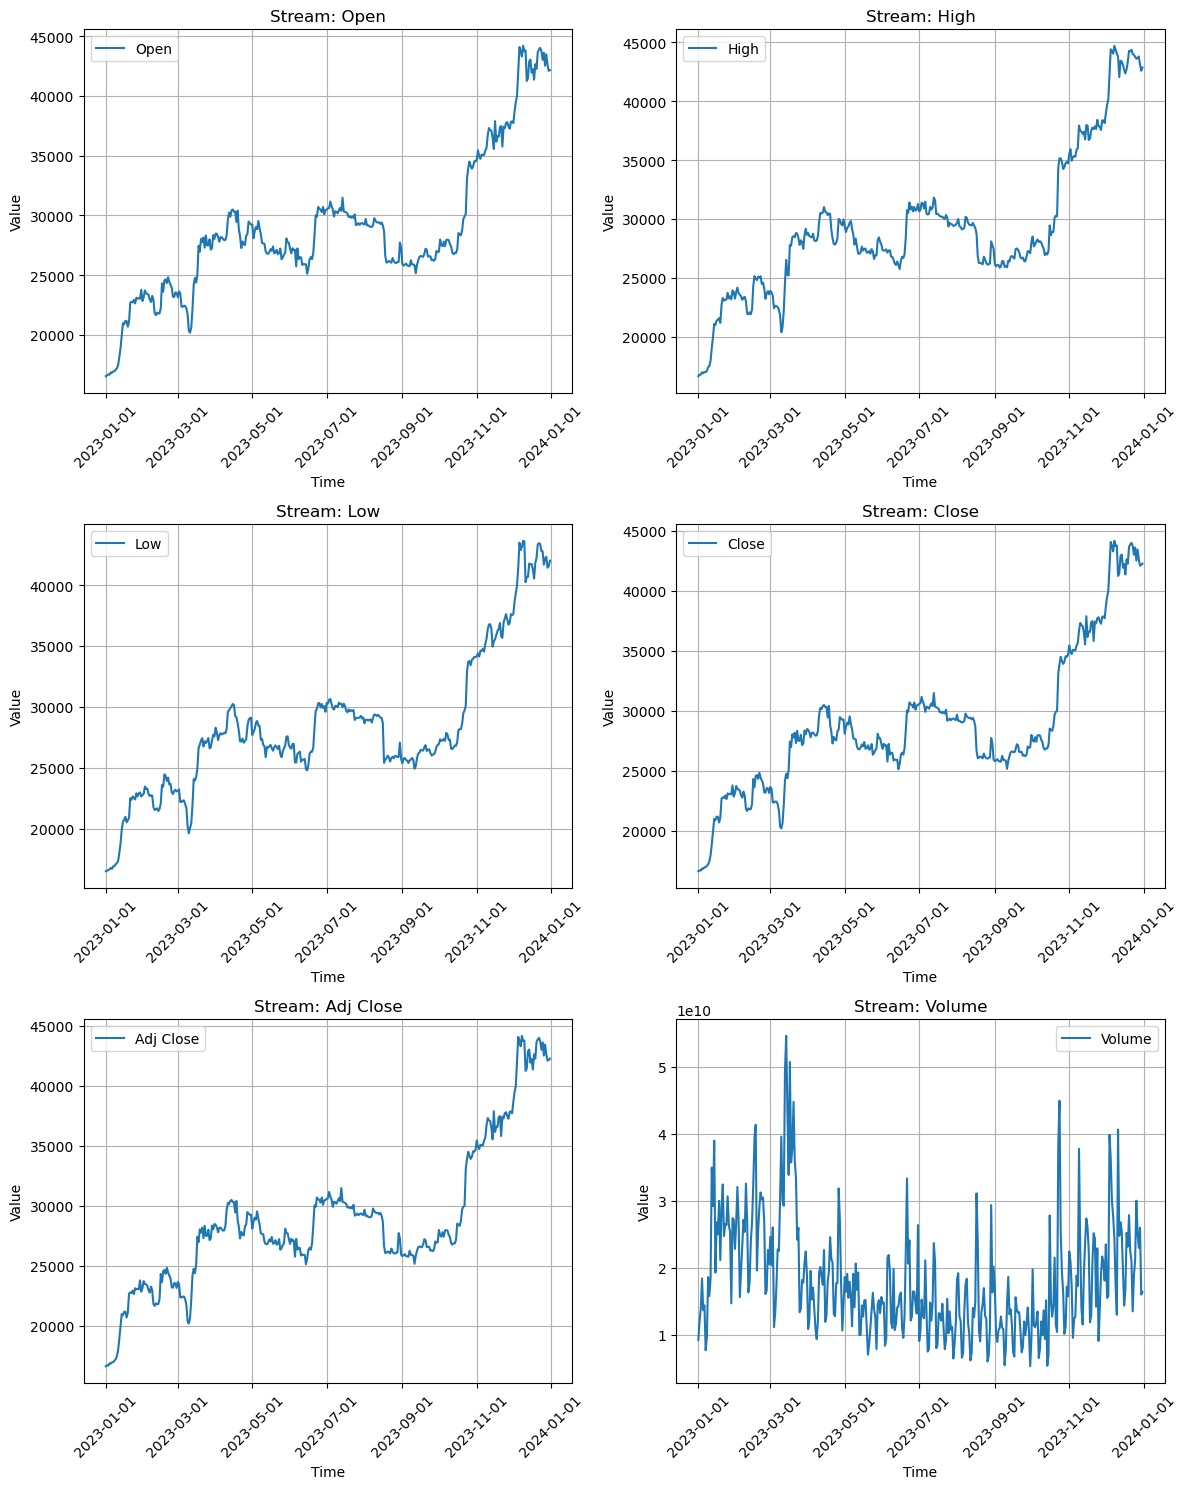

In [6]:
# Example usage 
line_plot_func.line_plot(btc_df, streams=None, start_time=None, end_time=None, normalise=False)

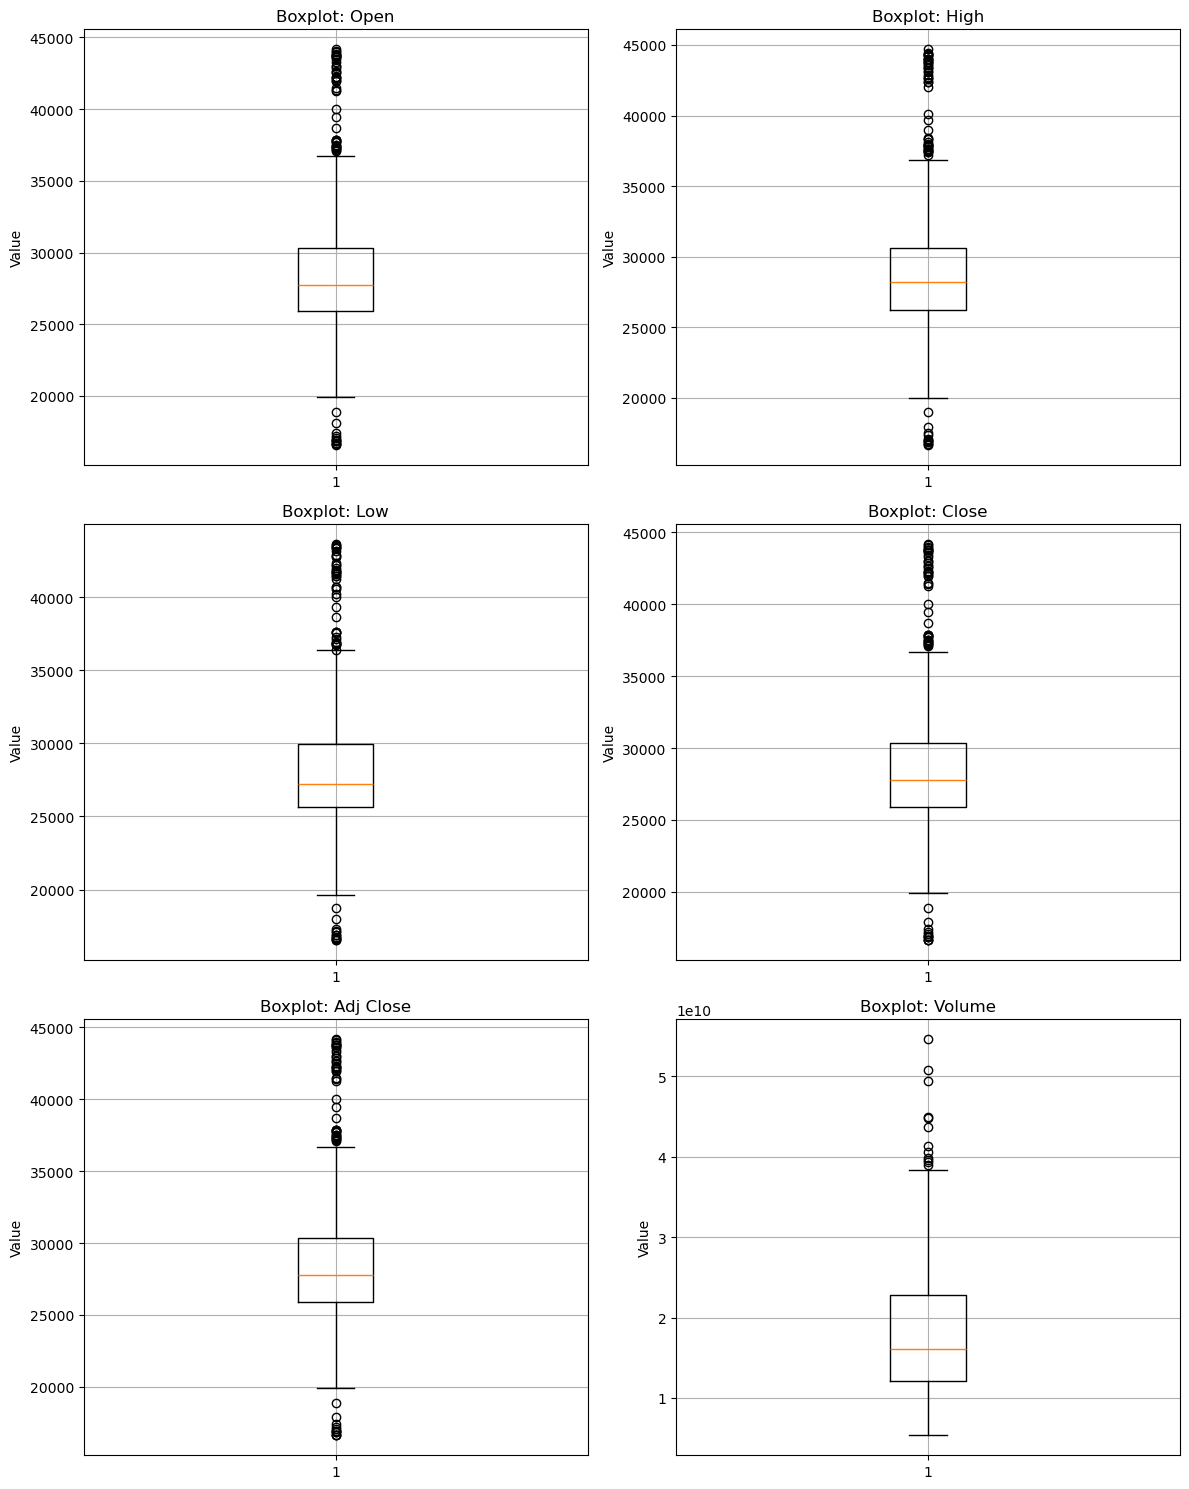

In [7]:
boxplot_func.boxplot(btc_df, streams=None)

In [15]:
if 'Date' in btc_df.index.names:
    btc_df.reset_index(inplace=True)

# output_notebook()

    
grouped_bar_chart_func.grouped_bar_chart(btc_df, category_col='Date', value_cols=['Open','High'])

In [2]:
# Handling data GROUPBY
data2 = pd.read_csv('datasets/2881821.csv').drop(columns=['entry_id'])

numeric_cols = data2.select_dtypes(include=['number']).columns
data2[numeric_cols] = data2[numeric_cols].apply(pd.to_numeric, errors='coerce')

data2['created_at'] = pd.to_datetime(data2['created_at']).dt.floor('h')
data2['created_at'] = data2['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
data2 = data2.groupby(['created_at'])[numeric_cols].mean()


In [3]:
if 'created_at' in data2.index.names:
    data2.reset_index(inplace=True)
    
# Example usage (assuming you have a DataFrame 'data')
grouped_bar_chart_func.grouped_bar_chart(data2, category_col='created_at', value_cols=['field1', 'field2','field3'])